In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data - ссылка на исходный датасет. Статистика количества заражённых, умерших и выздоровевших в ходе продолжающейся по сей день эпидемии коронавируса.

Column Description

2019ncovdata.csv

    Sno - Serial number
    Date - Date and time of the observation in MM/DD/YYYY HH:MM:SS
    Province / State - Province or state of the observation (Could be empty when missing)
    Country - Country of observation
    Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised currently. So please clean them before using it)
    Confirmed - Number of confirmed cases
    Deaths - Number of deaths
    Recovered - Number of recovered cases


In [134]:
data = pd.read_csv('2019_nCoV_data.csv') 
confirmed = pd.read_csv('time_series_2019_ncov_confirmed.csv')
dead = pd.read_csv('time_series_2019_ncov_deaths.csv')
recovered = pd.read_csv('time_series_2019_ncov_recovered.csv')

In [135]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


**Построим распределение количества подтверждённых случаев заражения по странам, кроме Китая, по состоянию на 15 февраля**


In [125]:
data_last_date = data[data['Date'].str.contains('02/15/2020')]
data_last_date_confirmed = data_last_date.groupby(
    'Country').sum()[['Confirmed']].sort_values('Confirmed', ascending=False).reset_index()
data_last_date_confirmed = data_last_date_confirmed[ data_last_date_confirmed['Country'] != 'Mainland China' ] 

<BarContainer object of 29 artists>

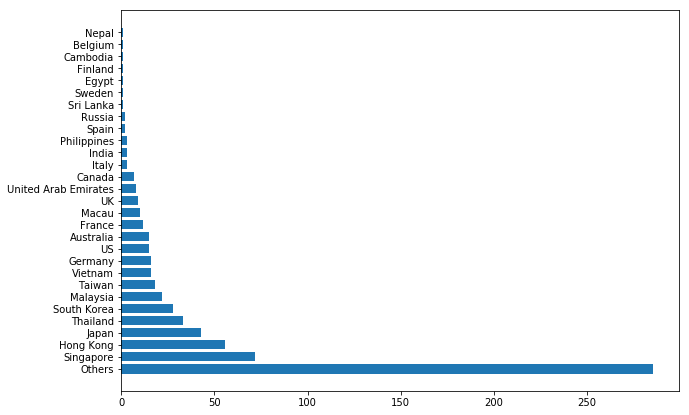

In [126]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
plt.barh(data_last_date_confirmed['Country'], data_last_date_confirmed['Confirmed'])

Используется число заражённых - непрерывная переменная. Поскольку в Китае наибольшее число заражённых (>50000 человек), то отображение Китая испортит визуализацию, а без него можно хорошо увидеть распределение заразившихся по всем остальным странам (Others, кстати, в данном случае круизный лайнер Diamond Princess, стоящий на карантине в Японии) 

**Теперь можно проследить за эволюцией болезни непосредственно в эпицентре возникновения - провинции Хубэй**

Выделим часть датасета, в которой сгруппируем по датам полное количество заражённых, умерших и выздоровевших в провинции Хубэй

In [127]:
data_china = data[ (data['Country'] == 
                  'Mainland China') & (data['Province/State'] == 
                                       'Hubei')].groupby('Date').sum().sort_values('Confirmed', ascending=True).reset_index()

In [128]:
data_china['Date'] = data_china['Date'].apply(lambda word: word.split('/'))


In [129]:
data_china['Date'] = data_china['Date'].apply(lambda word: word[1]+'/'+word[0])


In [130]:
#перевёл дату к формату день/месяц без указания года, т.к все события проходят в 2020 году
data_china.head()

,Date,Sno,Confirmed,Deaths,Recovered
0,23/01,52,444.0,17.0,28.0
1,24/01,84,549.0,24.0,31.0
2,25/01,125,1052.0,52.0,42.0
3,26/01,169,1423.0,76.0,44.0
4,27/01,216,2714.0,100.0,47.0


In [131]:
trace0 = go.Bar(
    x=data_china['Date'],
    y=data_china['Confirmed'],
    name='Количество заражённых',
    orientation = 'v'
)

trace1 = go.Bar(
    x=data_china['Date'],
    y=data_china['Deaths'],
    name='Количество умерших',
    orientation = 'v'
)

trace2 = go.Bar(
    x=data_china['Date'],
    y=data_china['Recovered'],
    name='Количество переболевших',
    orientation = 'v'
)

data = [trace0, trace1, trace2]
layout = {'title': 'Динамика числа заражённых, умерших и выздоровевших в китайской провинции Хубэй'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Цель - снова показать распределение указанных ранее величин в зависимости от времени. Кстати, скачок числа заражённых с 11 на 12 февраля связан с тем,
что была изменена методика диагностики коронавируса.

**Выявим топ-10 по распространённости болезни по китайским провинциям, кроме провинции Хубэй, откуда началось 
распространение вируса**

In [176]:
data_provinces = data_last_date[ (data_last_date['Country'] == 'Mainland China') & 
                                (data_last_date['Province/State'] != 'Hubei') ].head(10)

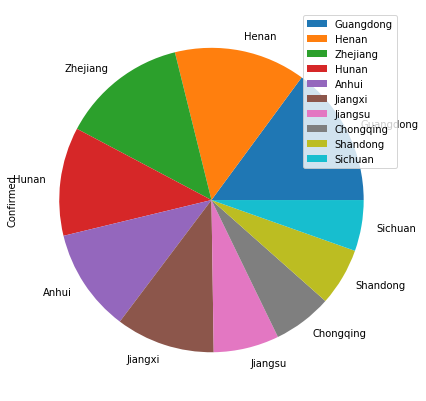

In [177]:
provinces = data_provinces[['Province/State', 'Confirmed']].set_index('Province/State')
provinces.plot(kind='pie', y='Confirmed')

SyntaxError: invalid syntax (<ipython-input-183-c756ae09e2e4>, line 1)